# Chapter 8. Dimensionality Reduction
## PCA

In [16]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
y = boston['target']
X.shape, y.shape

((506, 13), (506,))

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [19]:
X_reduced.shape

(506, 2)

In [22]:
print(pca.explained_variance_ratio_)

[0.80582318 0.16305197]


### Choosing the Right Number of Dimensions

In [24]:
import numpy as np 
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [26]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X)

### Incremental PCA

In [27]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X)

In [28]:
X_reduced.shape

(506, 2)

In [ ]:
# Using memmap class, which allows to manipulate a large array
""" X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
    batch_size = m // n_batches
    inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
    inc_pca.fit(X_mm) """

## Exercises

### 8.

In [35]:
from  sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [45]:
X_train = X[:60000, :]
X_test = X[60000:, :]
y_train = y[:60000]
y_test = y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [69]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

Wall time: 38.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9693

In [71]:
# PCA with 95% variance explained
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.95) + 1
pca = PCA(n_components=d)
X_train_reduced = pca.fit_transform(X_train)

In [73]:
%%time
rf_clf.fit(X_train_reduced, y_train)

Wall time: 1min 28s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
X_test_reduced = pca.transform(X_test)
y_pred = rf_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9488

## 9.

In [75]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [78]:
import matplotlib.pyplot as plt

In [93]:
y = y.astype(int)

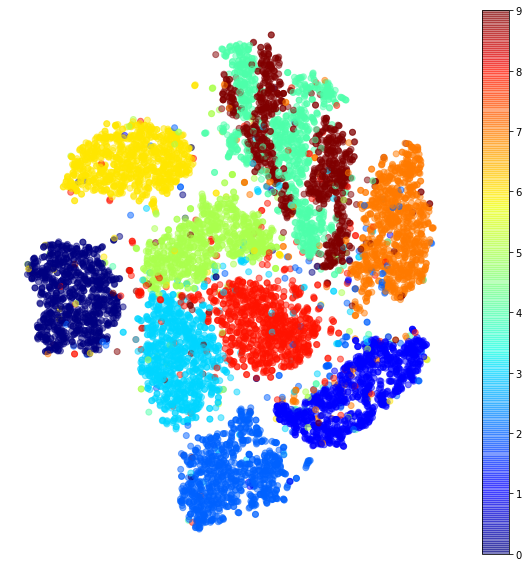

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='jet', alpha=.5);
plt.axis('off')
plt.colorbar();